In [86]:
#impot all libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import boxcox, probplot
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.decomposition import PCA
from scipy.stats import boxcox
import scipy.stats as stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression


In [87]:
data = pd.read_csv('banking.csv')
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


### a. Preprocess the dataset as specified in the data mining process.

### Handle Missing Values

In [88]:
print(data.isnull().sum())

cat_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
num_features = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed']

# Initialize SimpleImputer for categorical and numerical features
imputer_cat = SimpleImputer(strategy='most_frequent')
imputer_num = SimpleImputer(strategy='median')

# Apply imputer to categorical features to handle NaN values
data[cat_features] = imputer_cat.fit_transform(data[cat_features])

# Apply imputer to numerical features to handle NaN values
data[num_features] = imputer_num.fit_transform(data[num_features])

data['pdays'] = data['pdays'].replace(999, -1)


for feature in cat_features:
    mode_value = data[feature].mode()[0]
    data[feature] = data[feature].replace('unknown', mode_value)

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64


In [89]:
# Check for missing values again
print("\nMissing Values after Imputation:")
print(data.isnull().sum())

# Print summary statistics of the dataset
print("\nSummary Statistics of the Dataset:")
print(data.describe(include='all'))

# Checking the first few rows of the dataset after imputation
print("\nFirst few rows of the dataset after imputation:")
print(data.head())

# Optionally, print the last few rows to ensure completeness
print("\nLast few rows of the dataset after imputation:")
print(data.tail())


Missing Values after Imputation:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

Summary Statistics of the Dataset:
                age     job  marital          education default housing  \
count   41188.00000   41188    41188              41188   41188   41188   
unique          NaN      11        3                  7       2       2   
top             NaN  admin.  married  university.degree      no     yes   
freq            NaN   10752    25008              13899   41185   22566   
mean       40.02406     NaN      NaN                NaN     NaN     NaN   
std        10.42125     NaN      NaN           

### Handle Outliers

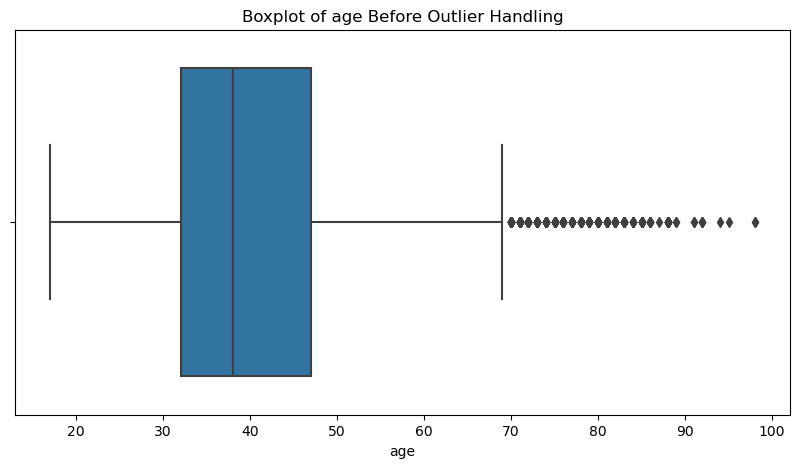

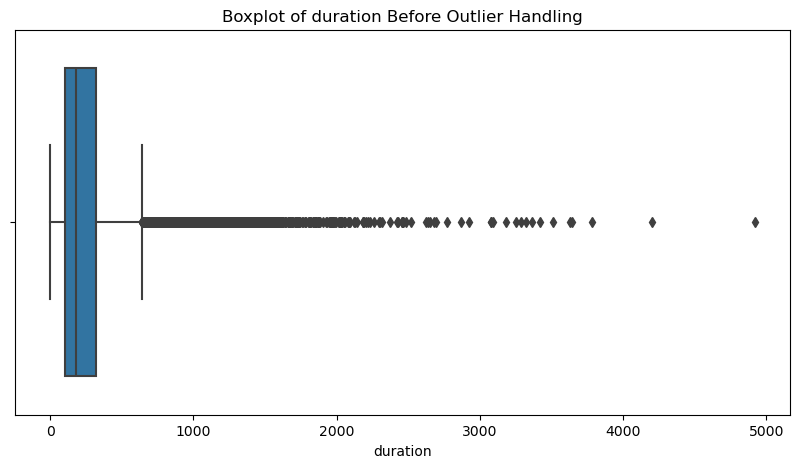

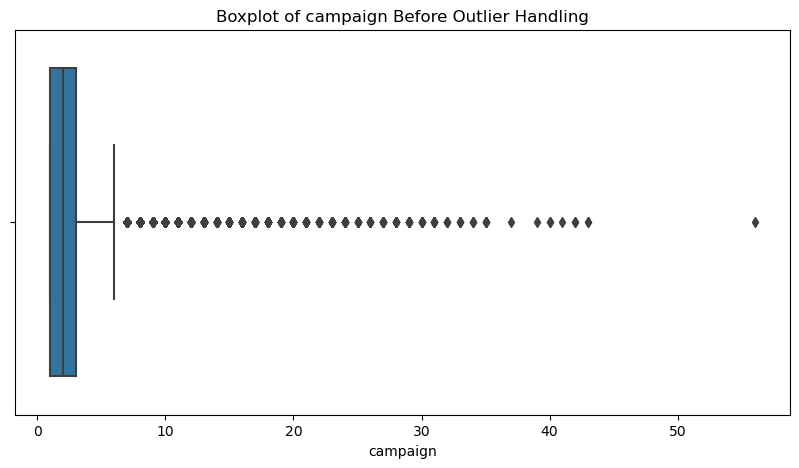

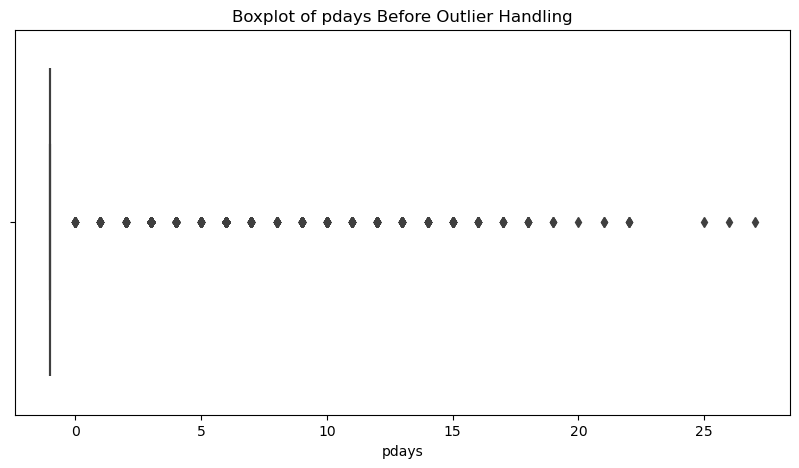

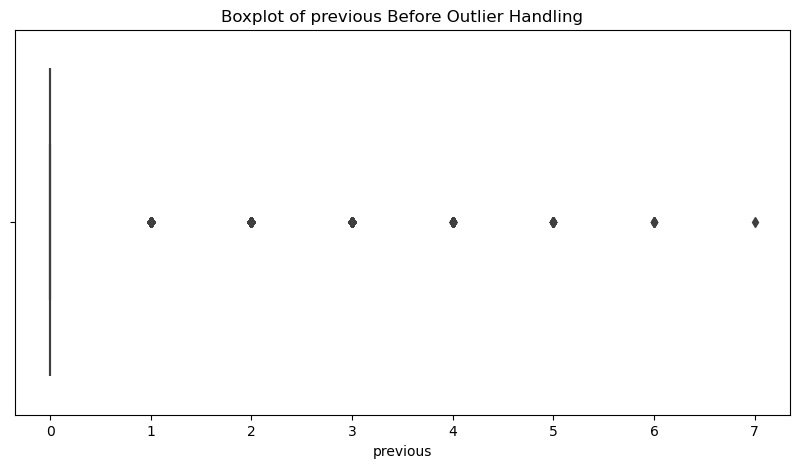

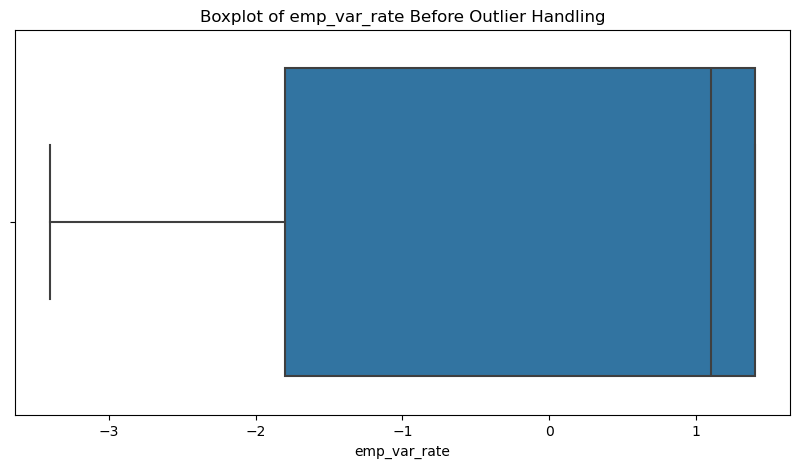

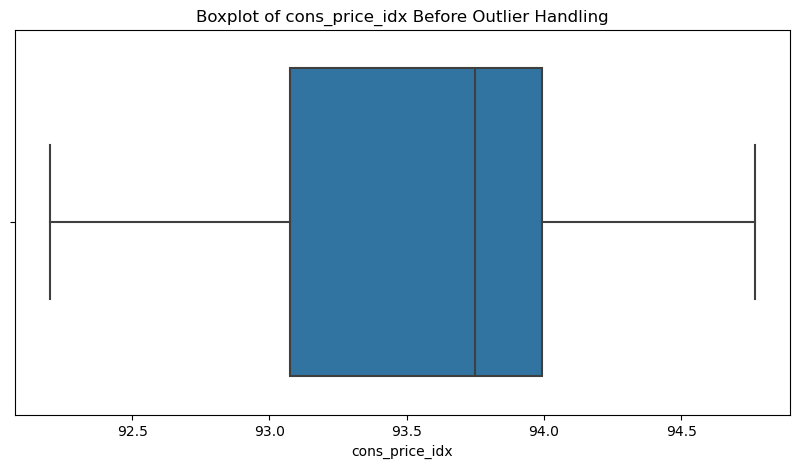

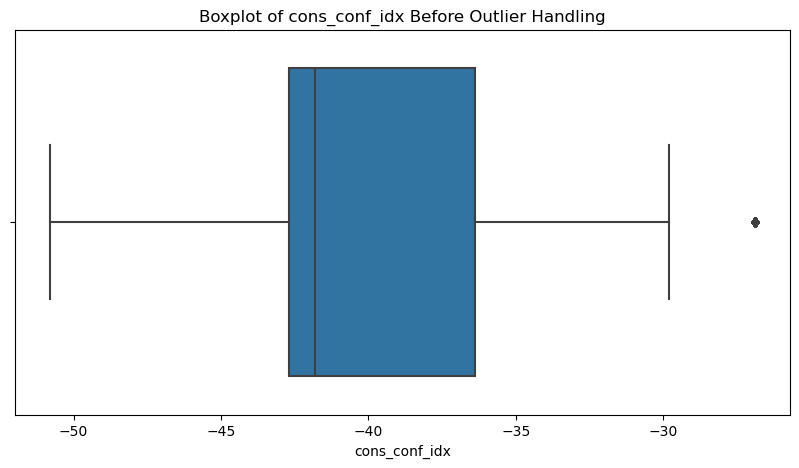

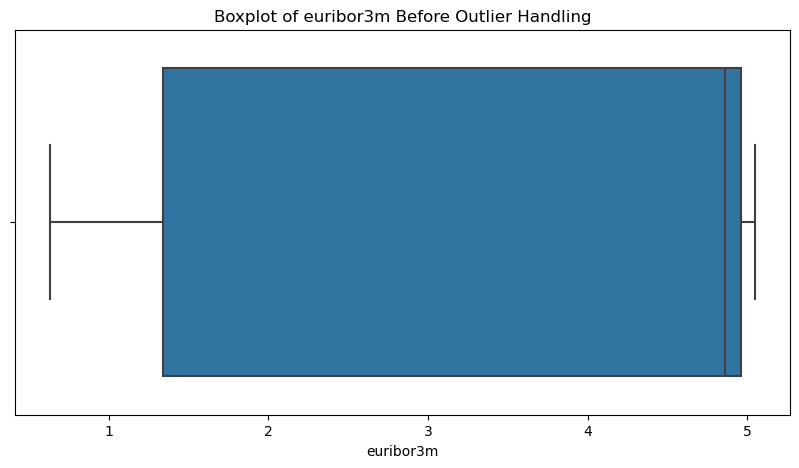

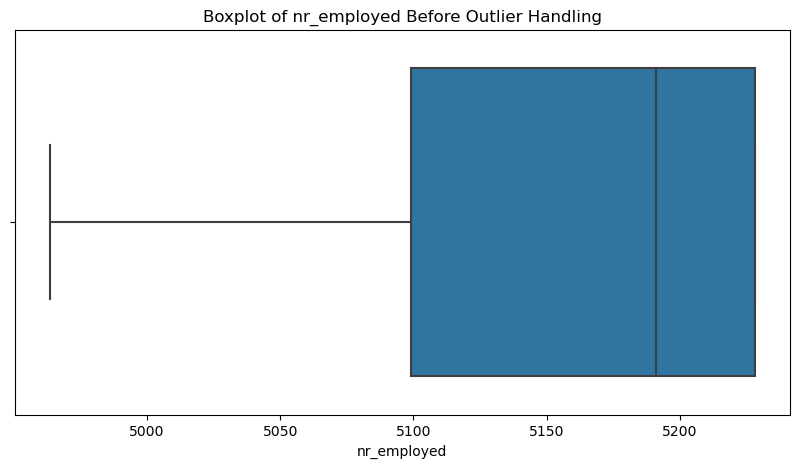

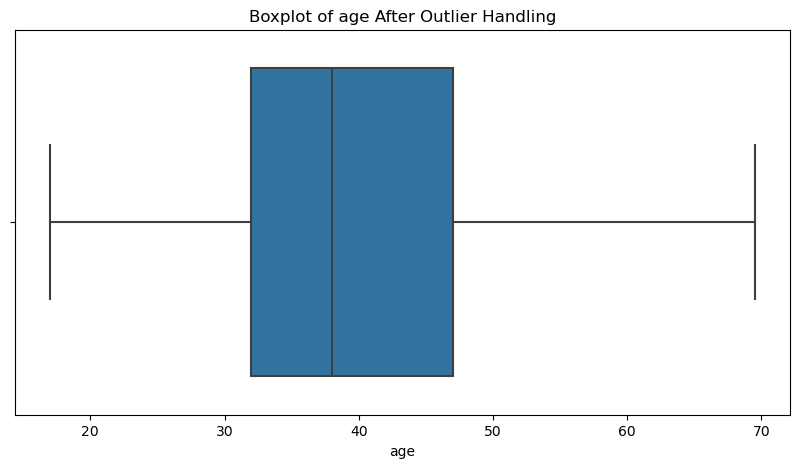

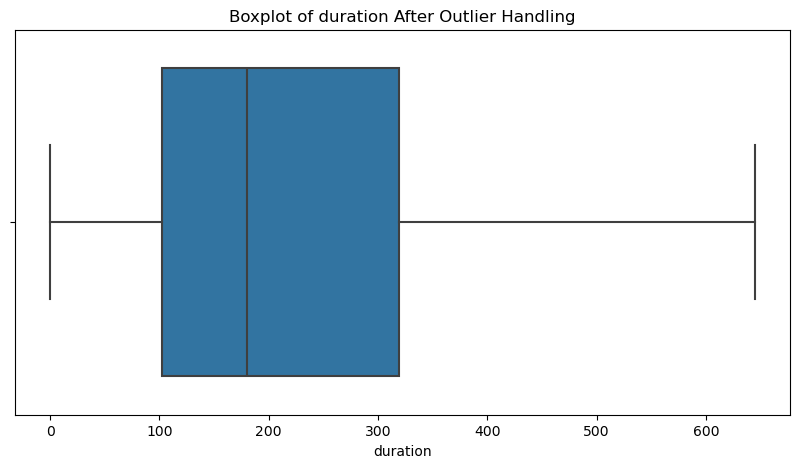

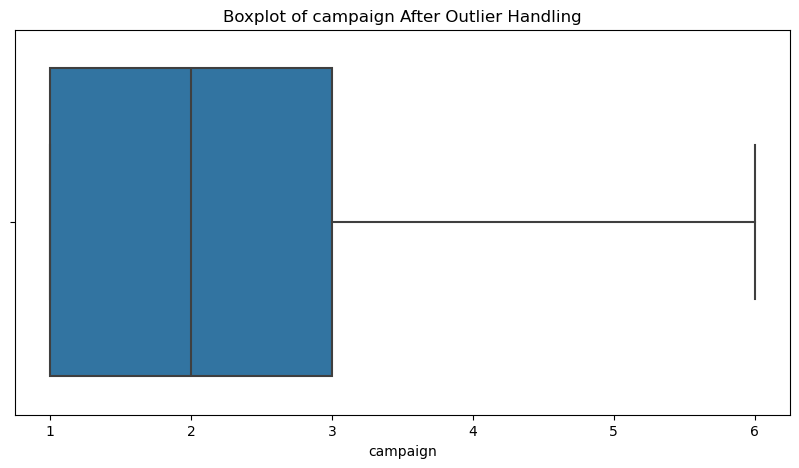

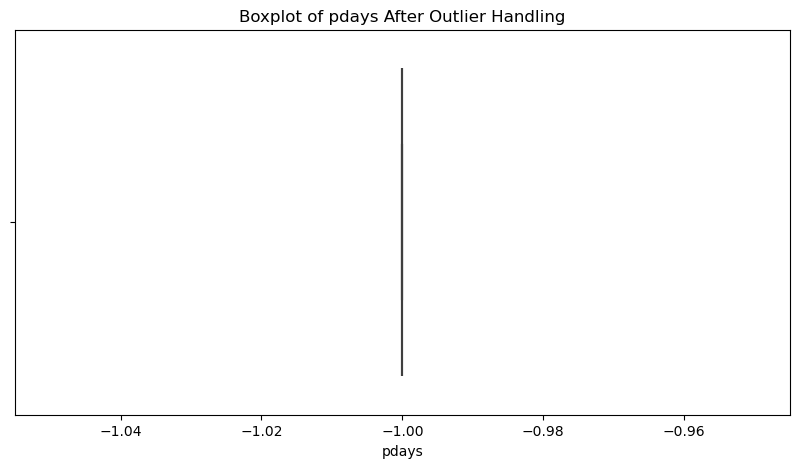

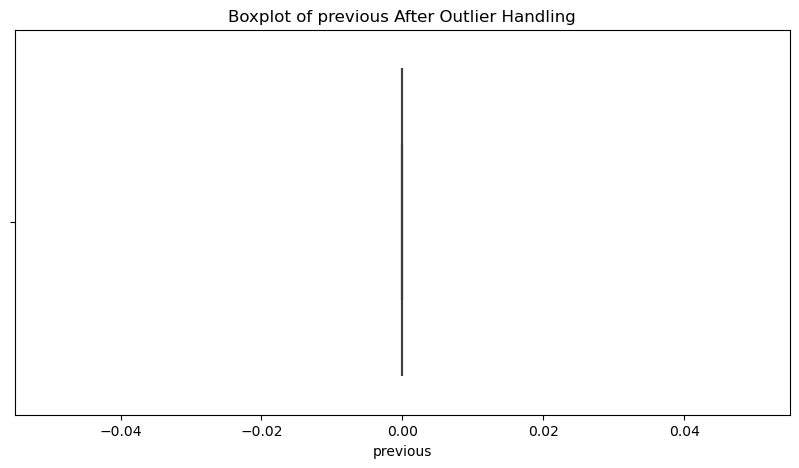

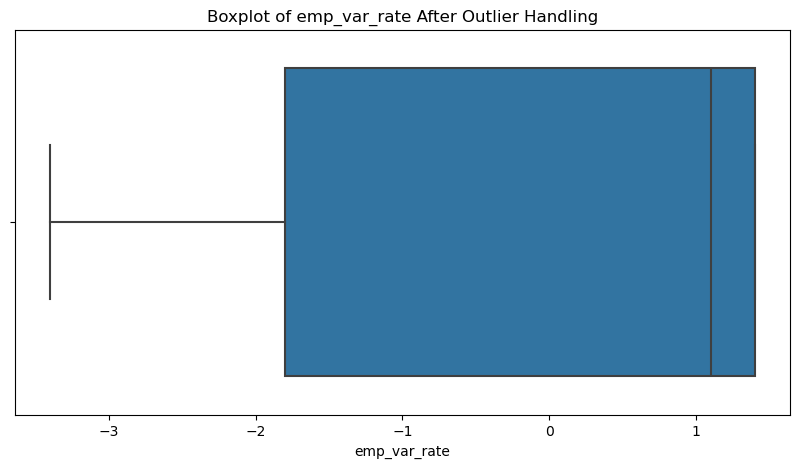

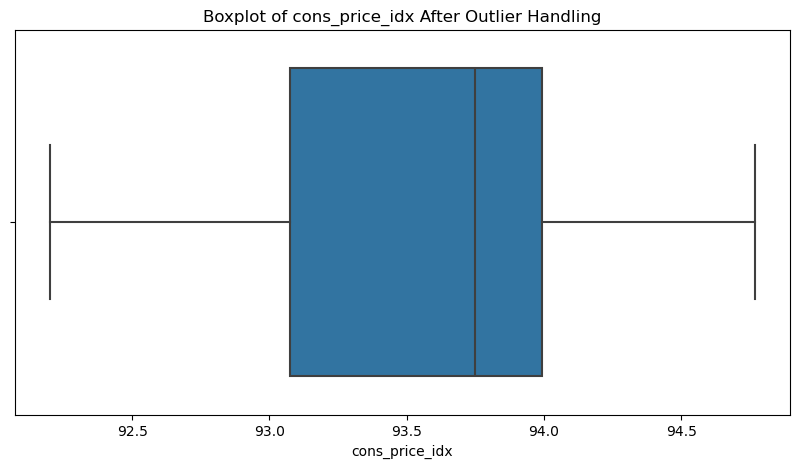

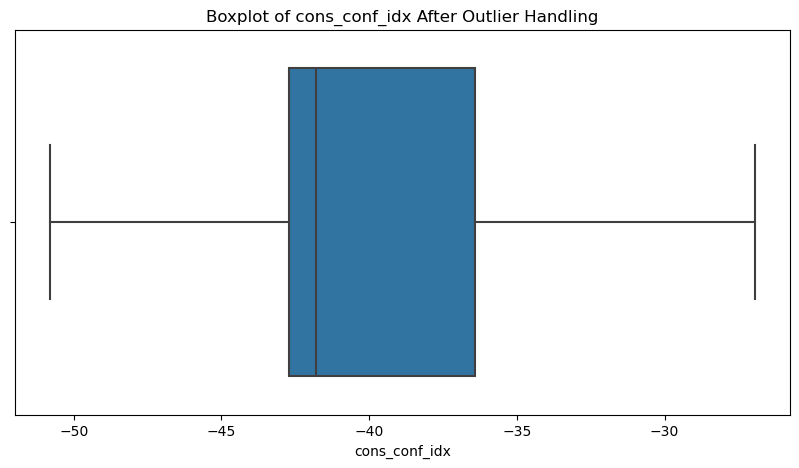

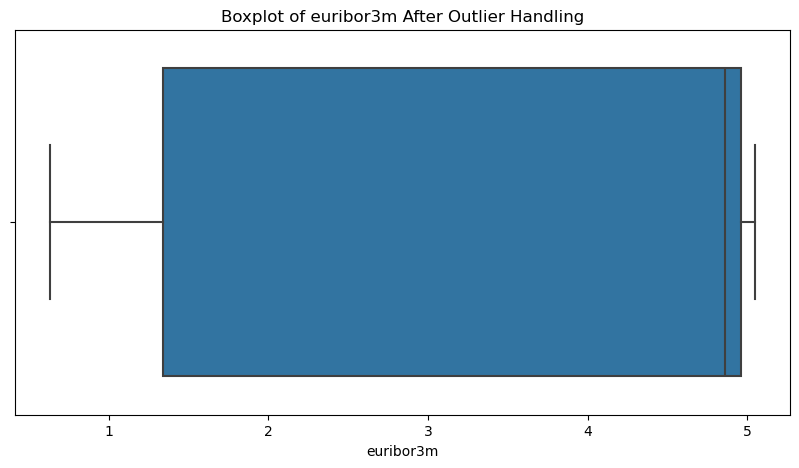

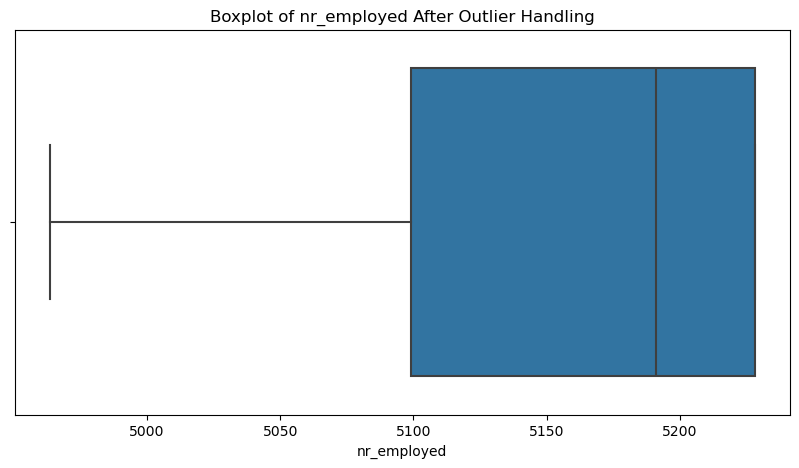

In [90]:
for feature in num_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=data[feature])
    plt.title(f'Boxplot of {feature} Before Outlier Handling')
    plt.show()
    
# Function to cap outliers using the IQR method
def cap_outliers(df, features):
    for feature in features:
        Q1 = np.percentile(df[feature], 25)
        Q3 = np.percentile(df[feature], 75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[feature] = np.where(df[feature] < lower_bound, lower_bound, df[feature])
        df[feature] = np.where(df[feature] > upper_bound, upper_bound, df[feature])
    return df

# Apply the function to cap outliers in numerical features
data = cap_outliers(data, num_features)


for feature in num_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=data[feature])
    plt.title(f'Boxplot of {feature} After Outlier Handling')
    plt.show()

### Produce Q-Q Plots and Histograms of the features, and apply the transformations if required.

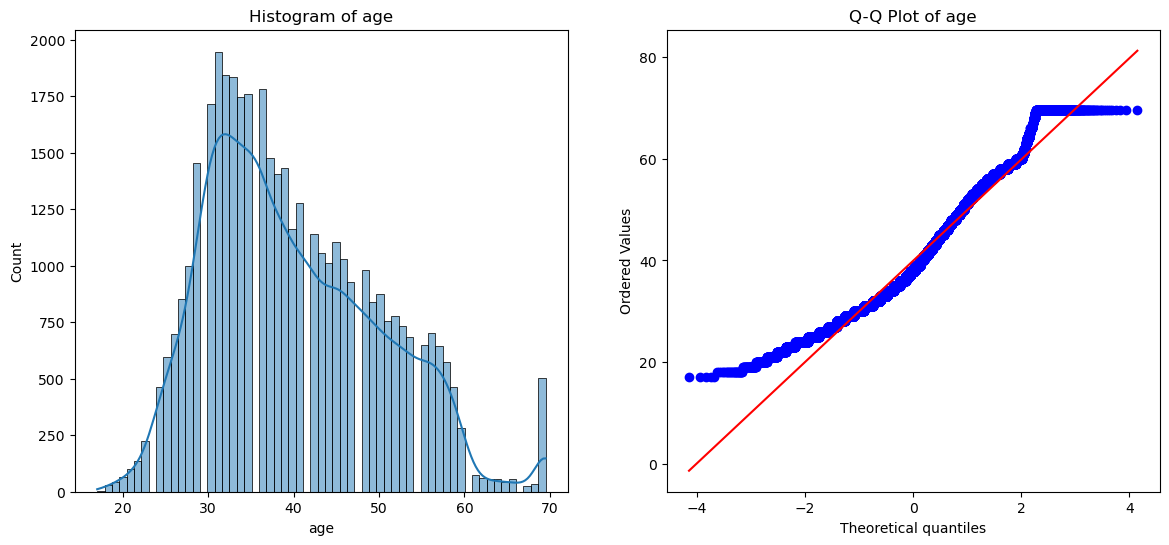

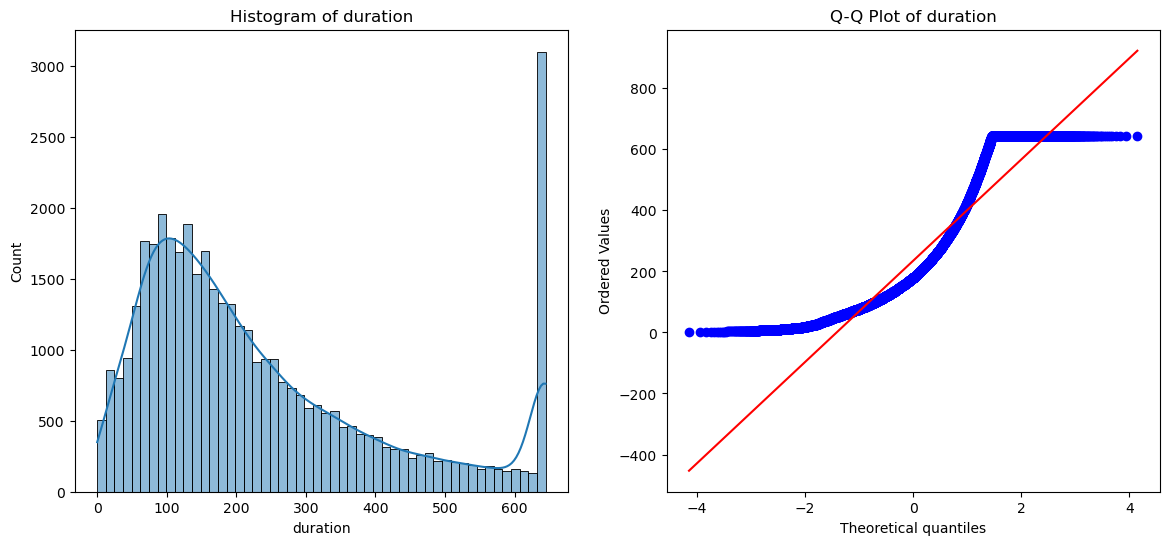

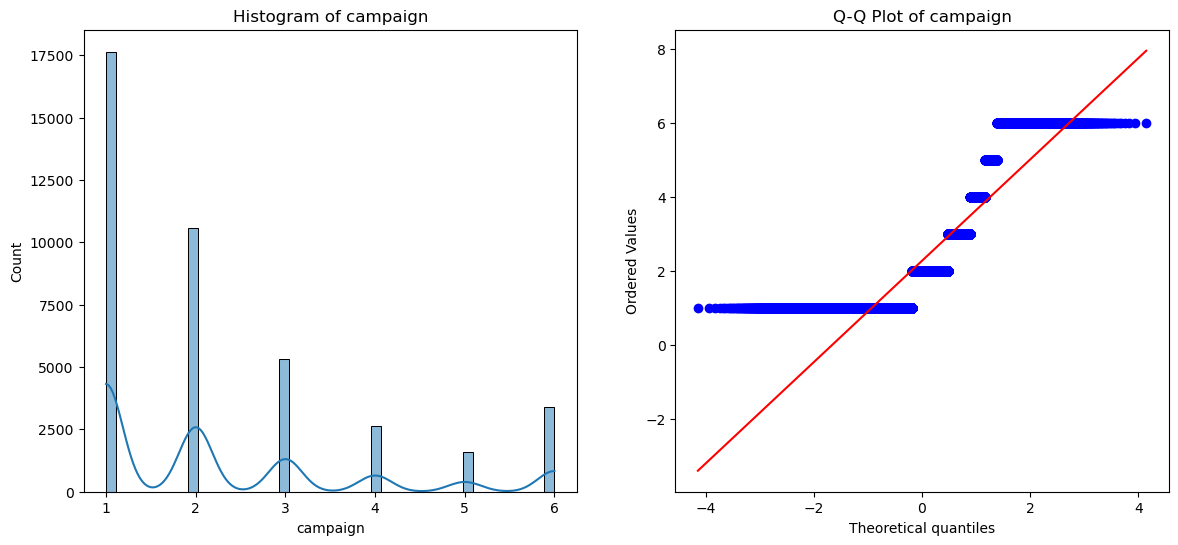

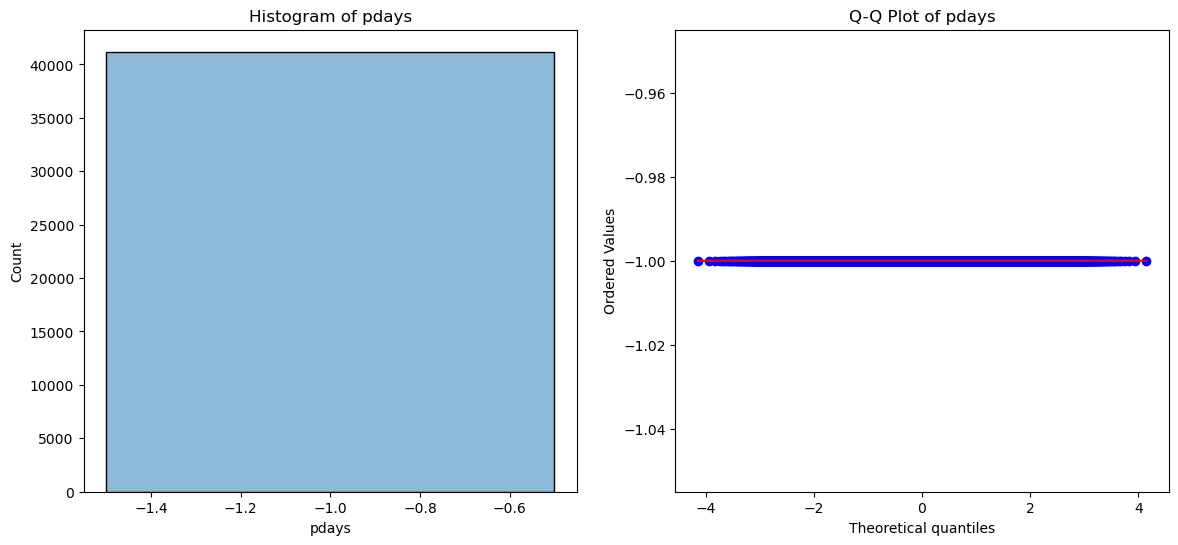

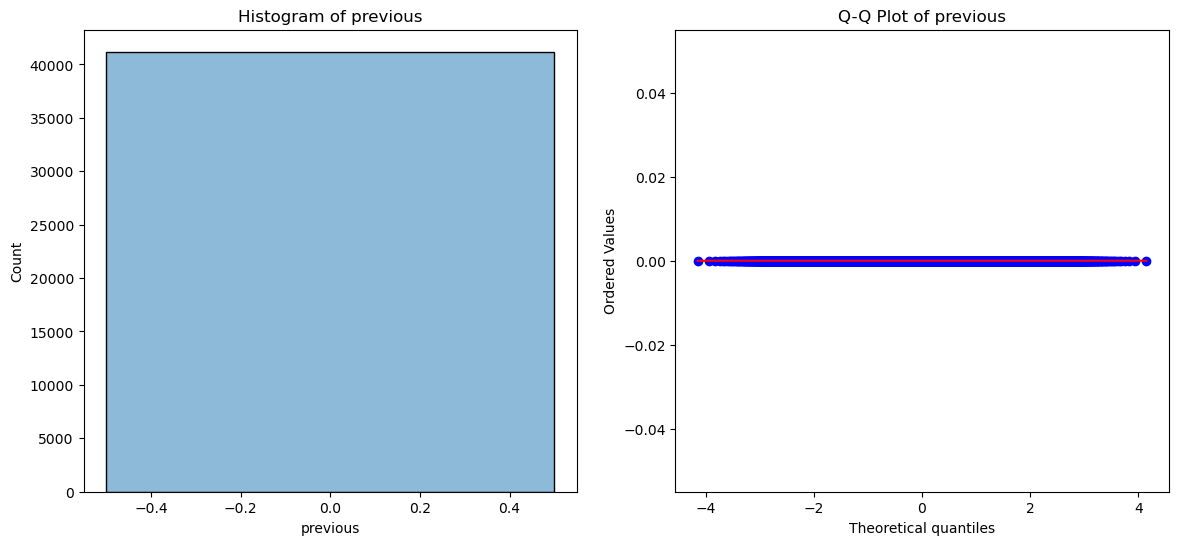

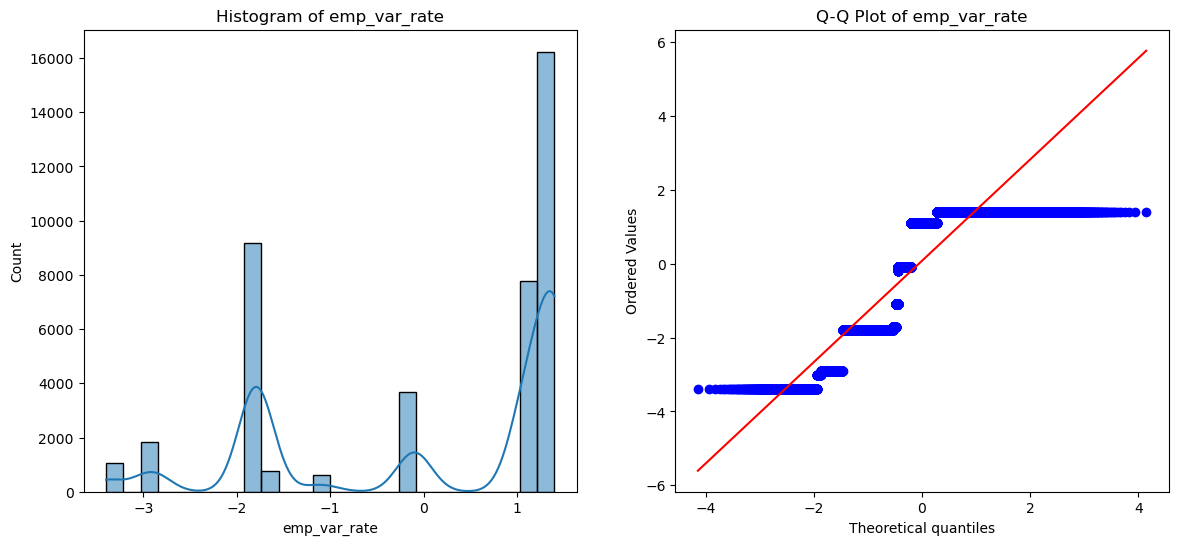

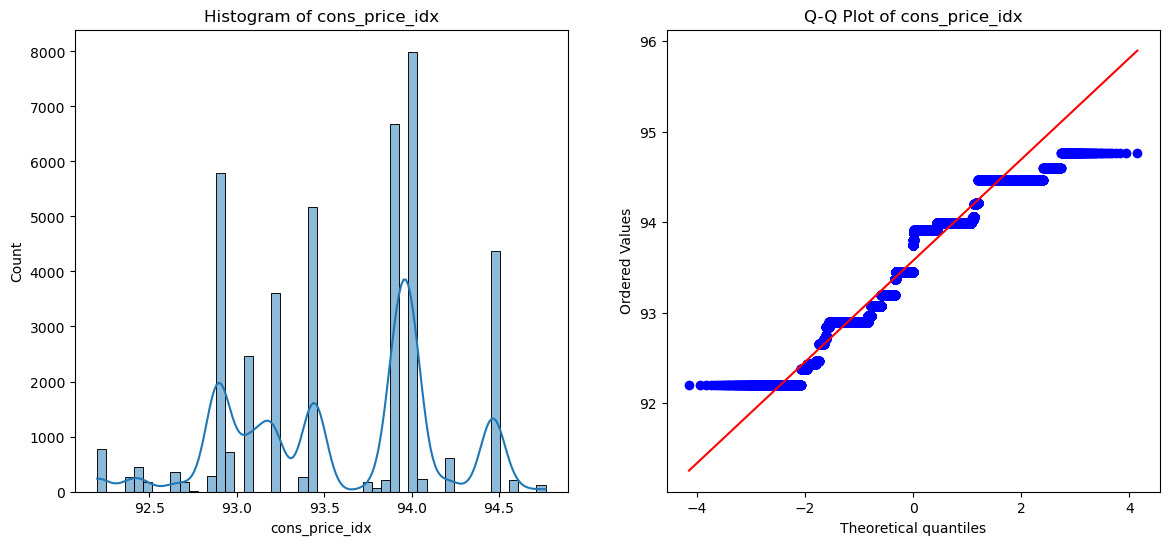

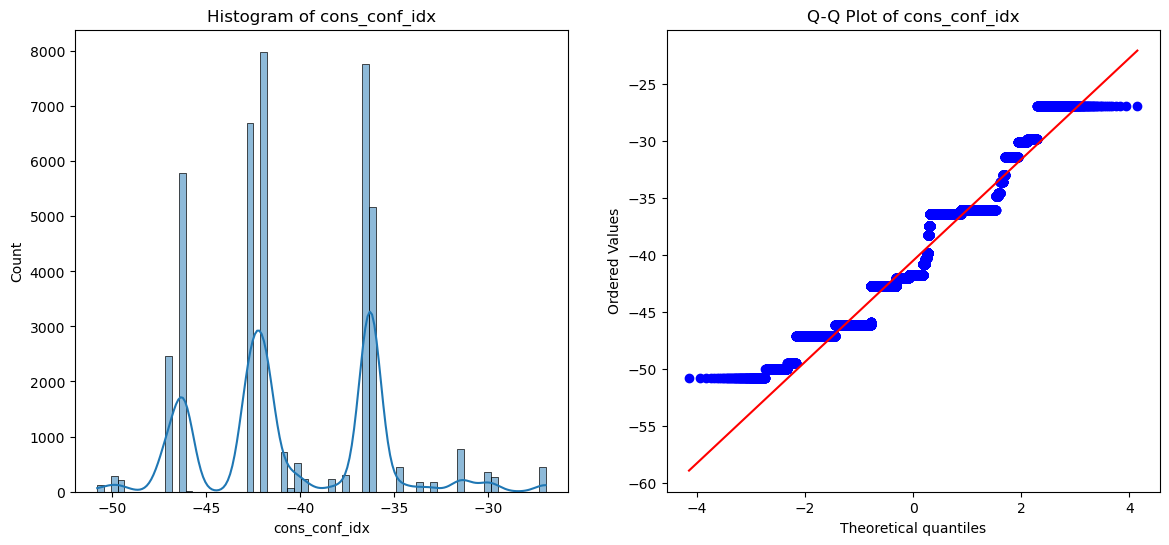

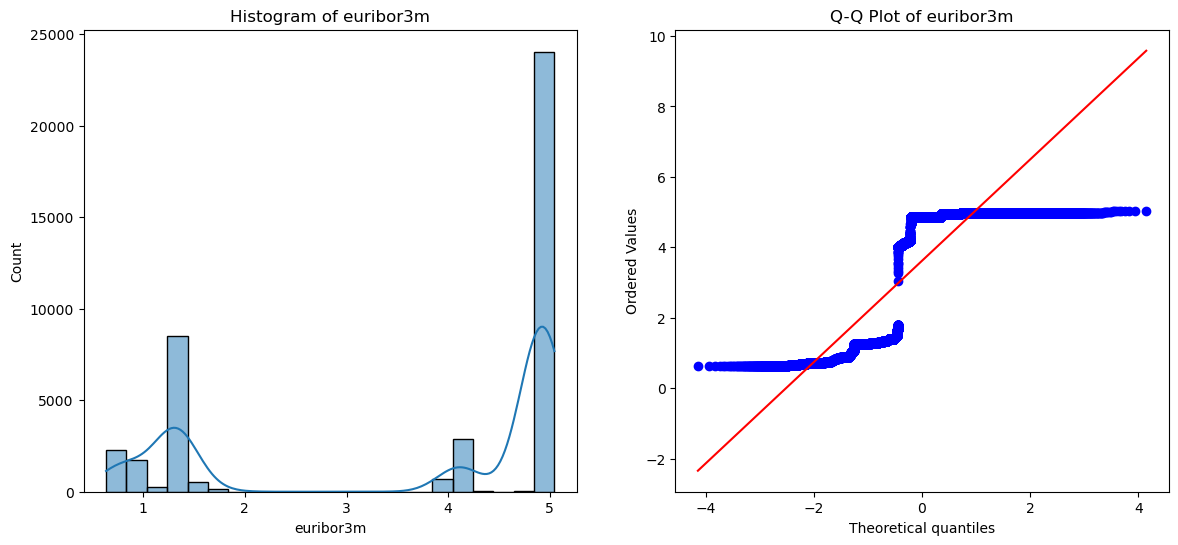

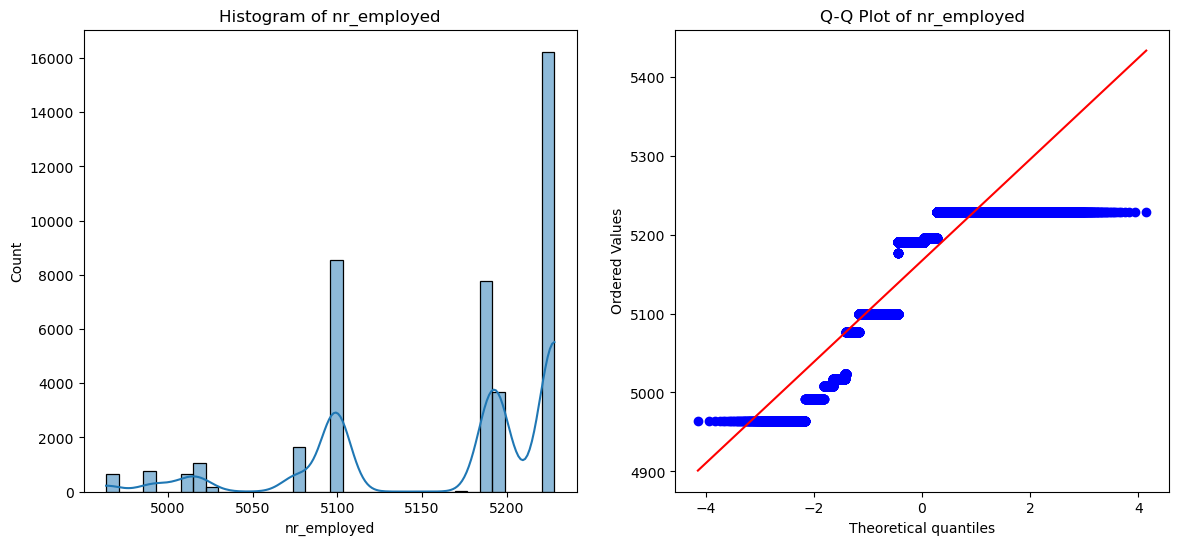

Applied Box-Cox transformation to age
Yeo-Johnson transformation failed for duration: name 'yeojohnson' is not defined
Applied Box-Cox transformation to campaign
Yeo-Johnson transformation failed for pdays: name 'yeojohnson' is not defined
Yeo-Johnson transformation failed for previous: name 'yeojohnson' is not defined
Yeo-Johnson transformation failed for emp_var_rate: name 'yeojohnson' is not defined
Applied Box-Cox transformation to cons_price_idx
Yeo-Johnson transformation failed for cons_conf_idx: name 'yeojohnson' is not defined
Applied Box-Cox transformation to euribor3m
Box-Cox transformation failed for nr_employed: The algorithm terminated without finding a valid bracket. Consider trying different initial points.


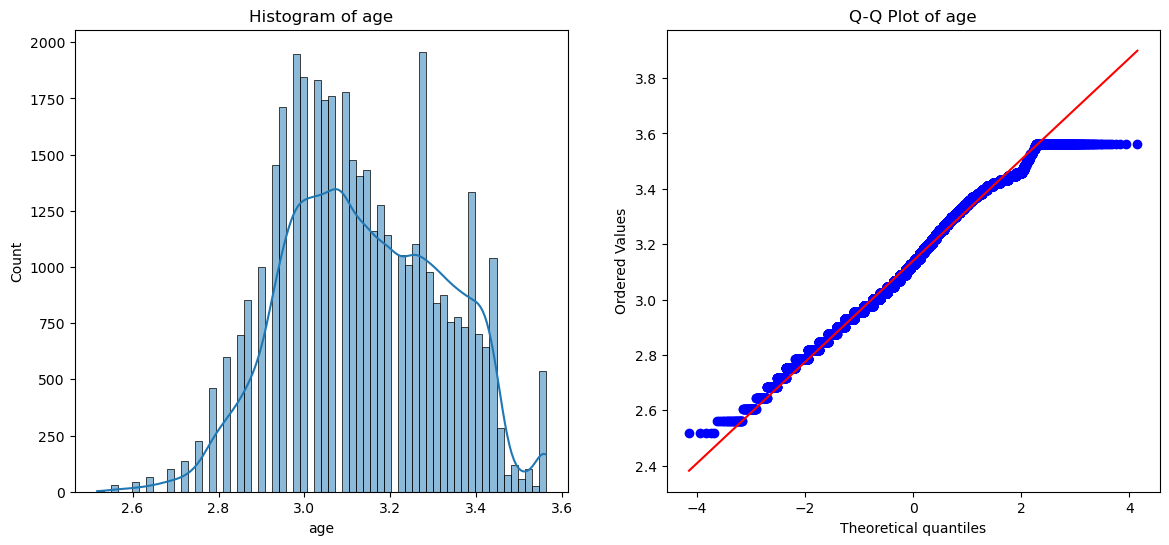

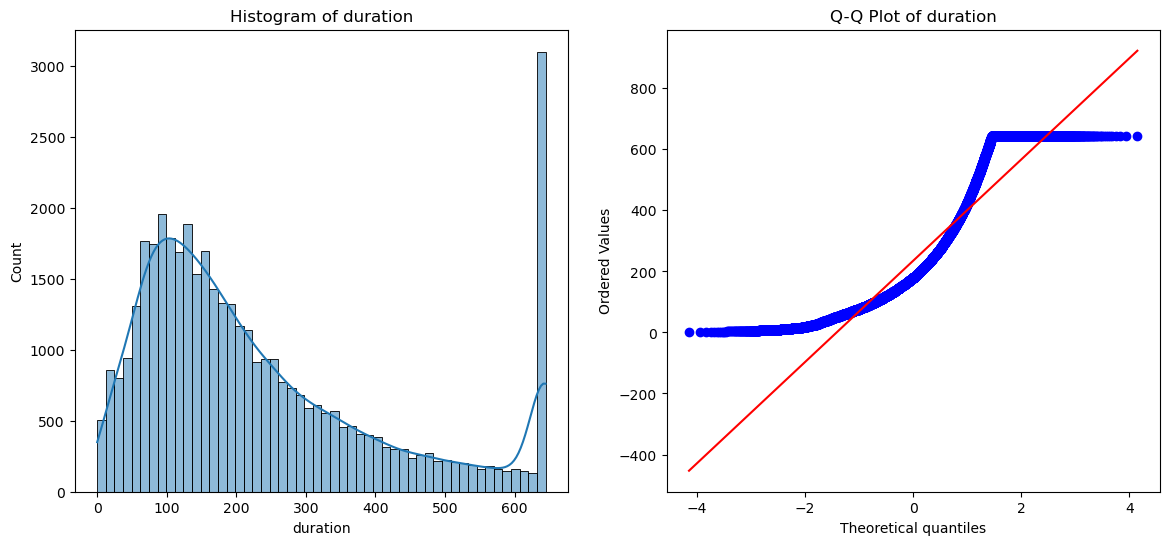

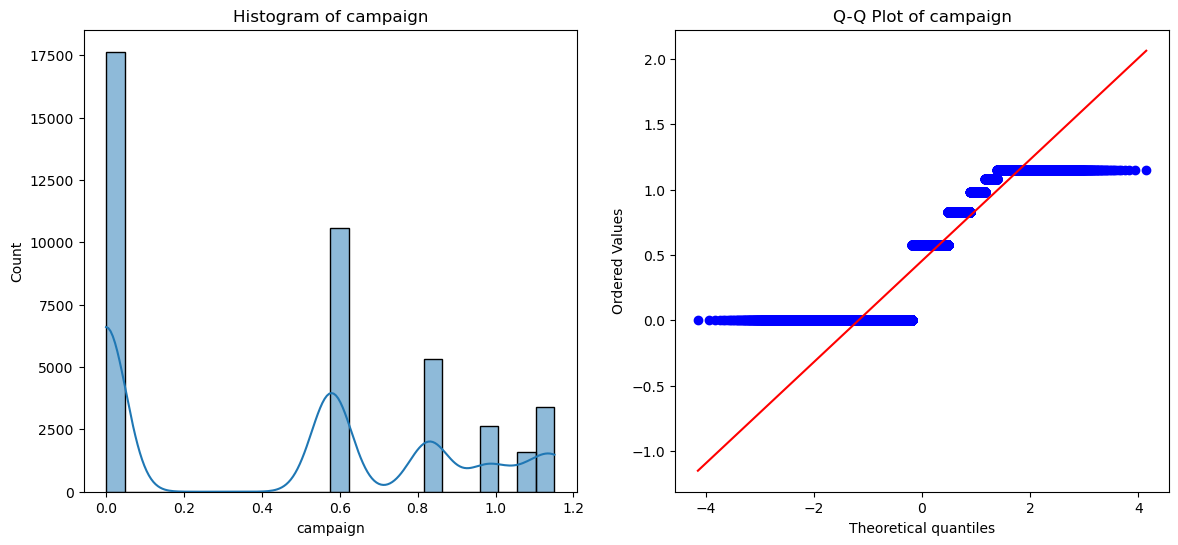

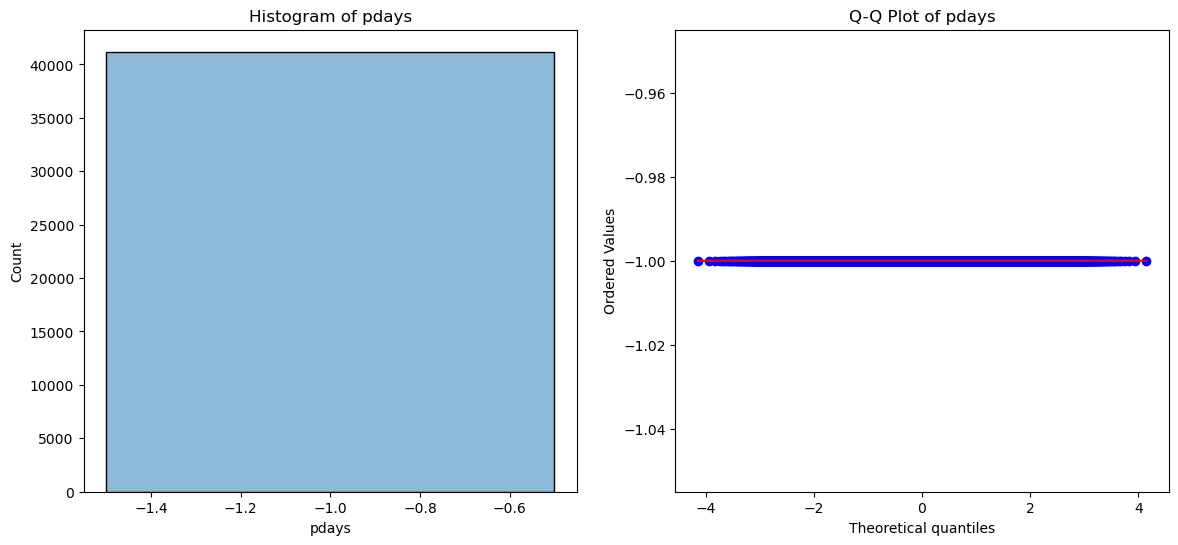

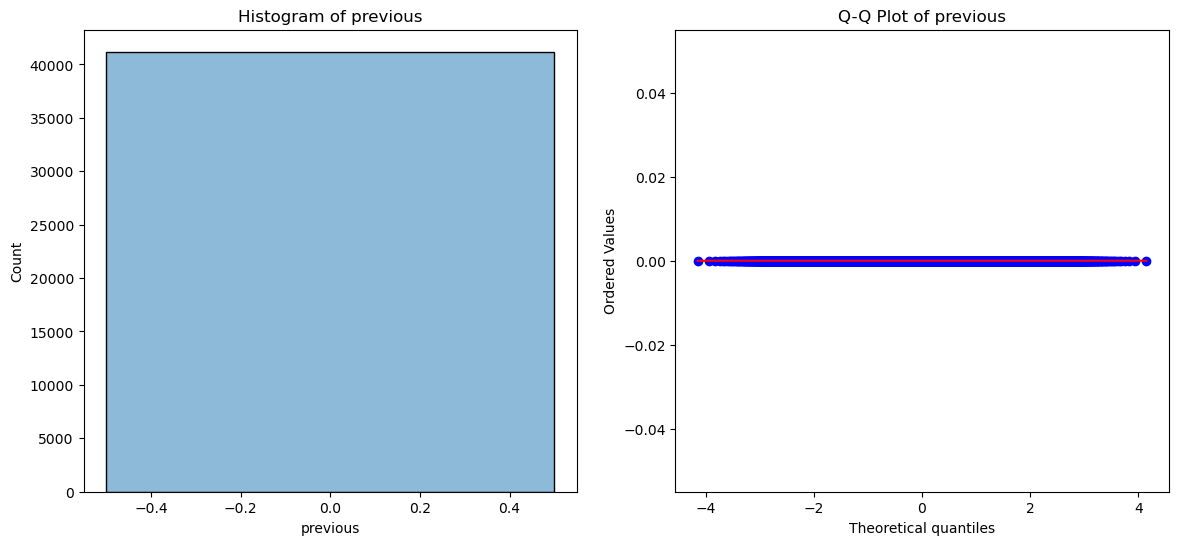

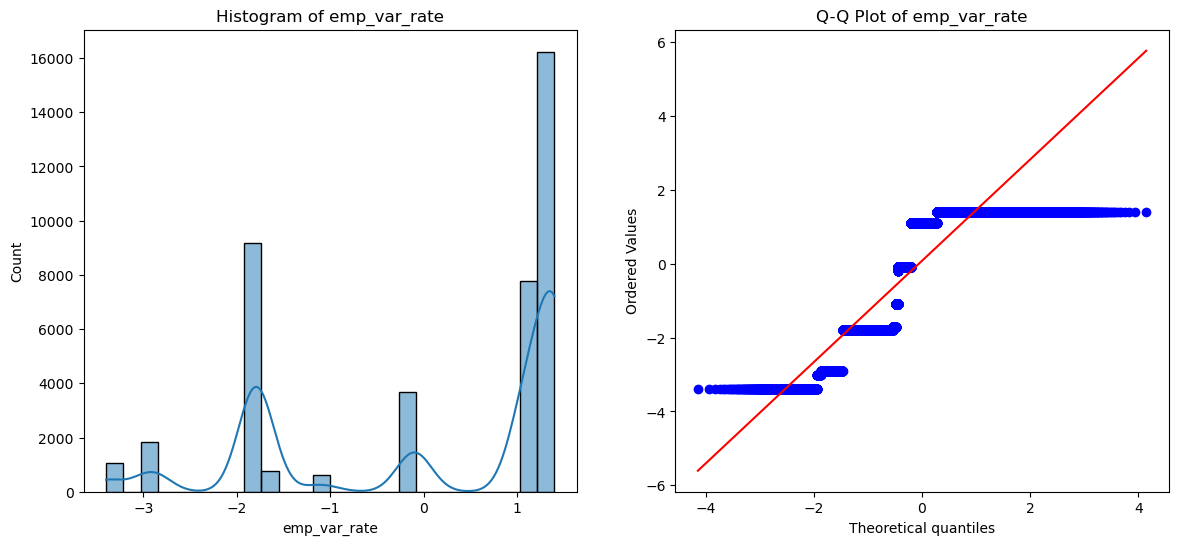

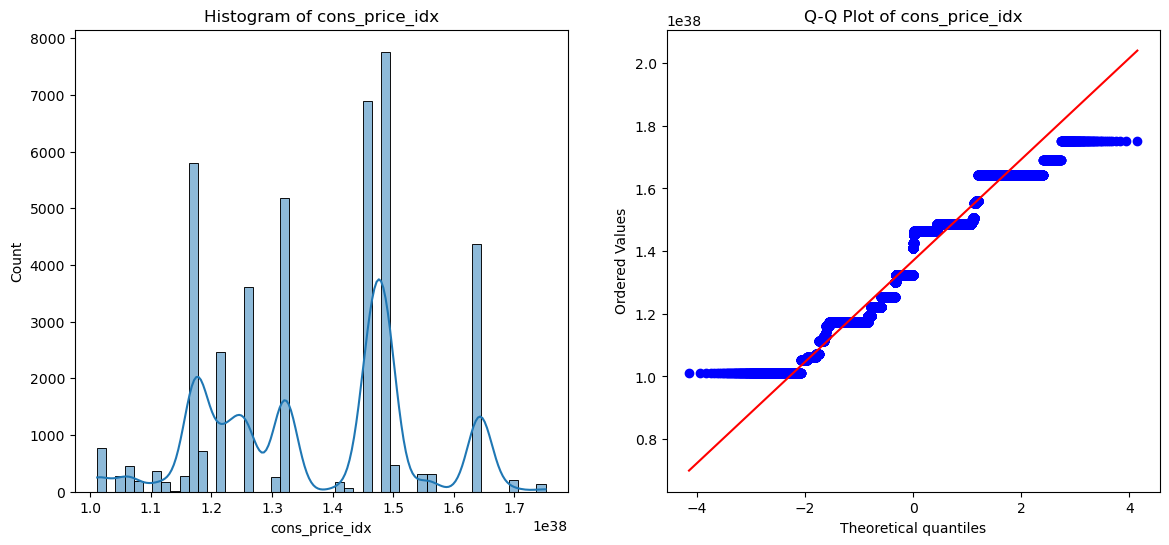

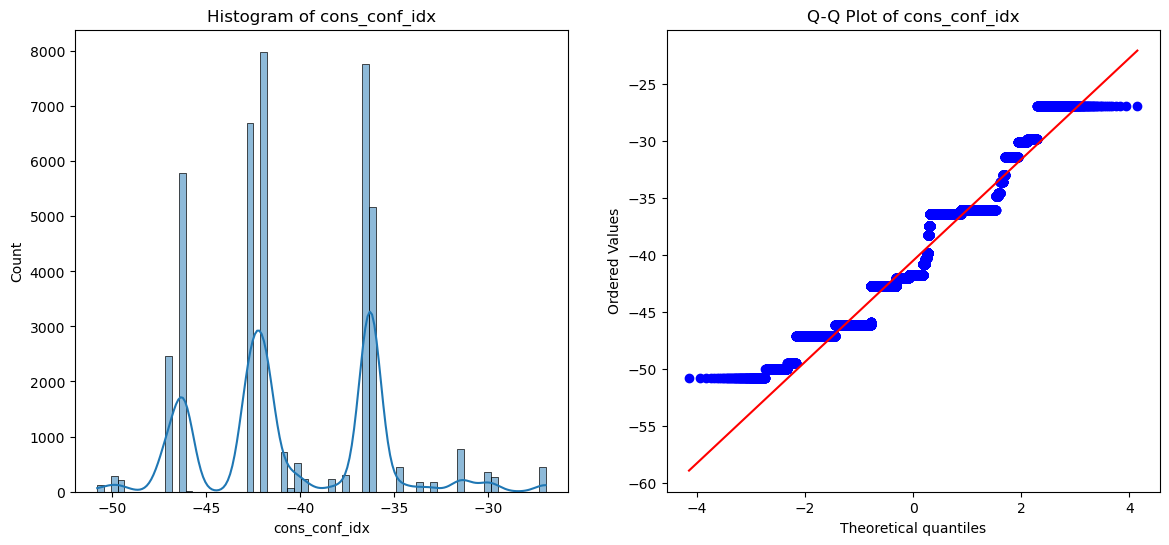

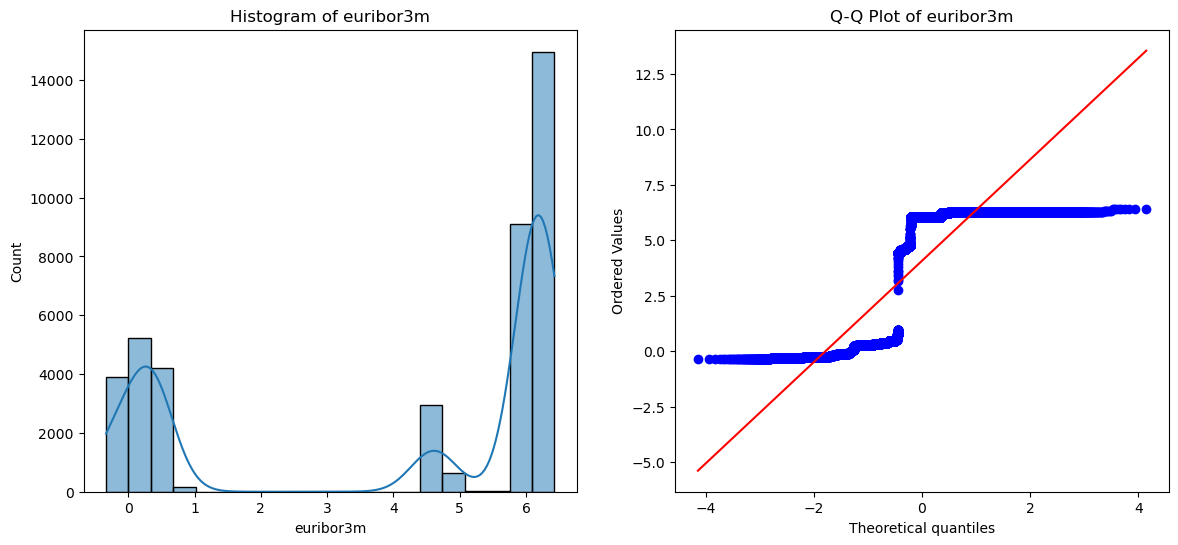

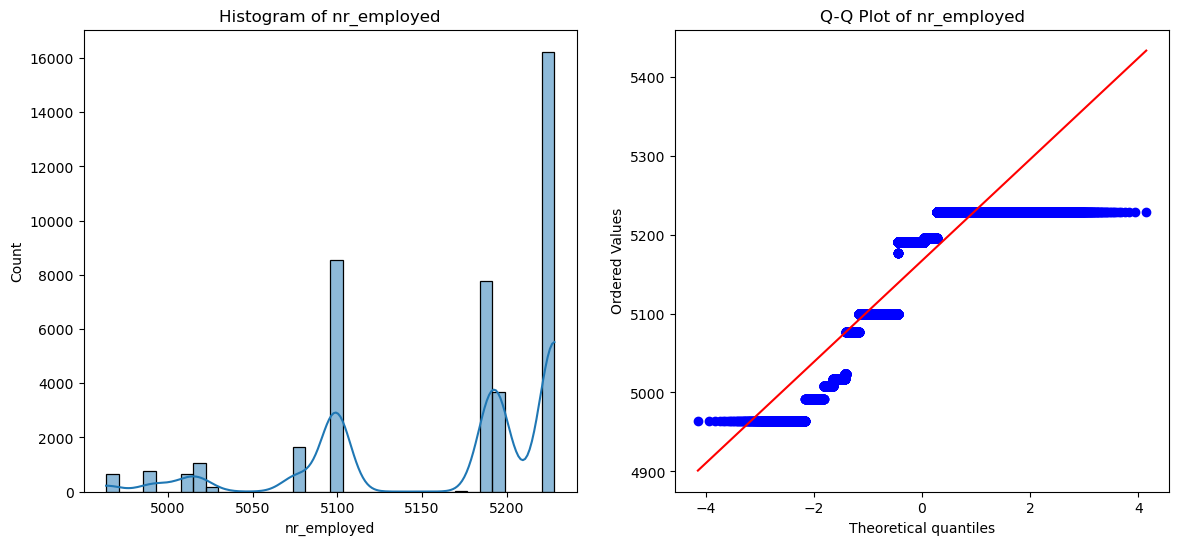

In [91]:
def plot_distributions(data, features):
    for feature in features:
        plt.figure(figsize=(14, 6))

        # Histogram
        plt.subplot(1, 2, 1)
        sns.histplot(data[feature], kde=True)
        plt.title(f'Histogram of {feature}')
        
        # Q-Q Plot
        plt.subplot(1, 2, 2)
        probplot(data[feature], dist="norm", plot=plt)
        plt.title(f'Q-Q Plot of {feature}')
        
        plt.show()

# Function to apply transformations
def apply_transformations(data, features):
    transformed_data = data.copy()
    for feature in features:
        # Apply Box-Cox transformation if data is strictly positive
        if (transformed_data[feature] > 0).all():
            try:
                transformed_data[feature], _ = boxcox(transformed_data[feature])
                print(f'Applied Box-Cox transformation to {feature}')
            except Exception as e:
                print(f'Box-Cox transformation failed for {feature}: {e}')
        
        # If Box-Cox failed or data contains non-positive values, try Yeo-Johnson transformation
        else:
            try:
                transformed_data[feature], _ = yeojohnson(transformed_data[feature])
                print(f'Applied Yeo-Johnson transformation to {feature}')
            except Exception as e:
                print(f'Yeo-Johnson transformation failed for {feature}: {e}')
    
    return transformed_data


# Plot histograms and Q-Q plots before transformation
plot_distributions(data, num_features)

# Apply transformations
transformed_data = apply_transformations(data, num_features)

# Plot histograms and Q-Q plots after transformation
plot_distributions(transformed_data, num_features)


### If it is required, apply suitable feature coding techniques.

In [92]:
print(data.columns)


Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')


In [93]:
le = LabelEncoder()
data['job_encoded'] = le.fit_transform(data['job'])

onehot_encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_features = onehot_encoder.fit_transform(data[['marital', 'education']])
encoded_df = pd.DataFrame(encoded_features, columns=onehot_encoder.get_feature_names_out(['marital', 'education']))
data = pd.concat([data, encoded_df], axis=1)
data.drop(['marital', 'education'], axis=1, inplace=True)


### Scale and/or standardized the features, produce relevant graphs to show the scaling/ standardizing effect.


In [94]:
# Standardize the numerical features
scaler = StandardScaler()
data_standardized = data.copy()
data_standardized[num_features] = scaler.fit_transform(data[num_features])


In [95]:
# Scale the numerical features
scaler = MinMaxScaler()
data_scaled = data.copy()
data_scaled[num_features] = scaler.fit_transform(data[num_features])

# Create a DataFrame for original, standardized, and scaled data
comparison_df = pd.DataFrame({
    'original': data[num_features].mean(),
    'standardized': data_standardized[num_features].mean(),
    'scaled': data_scaled[num_features].mean()
})

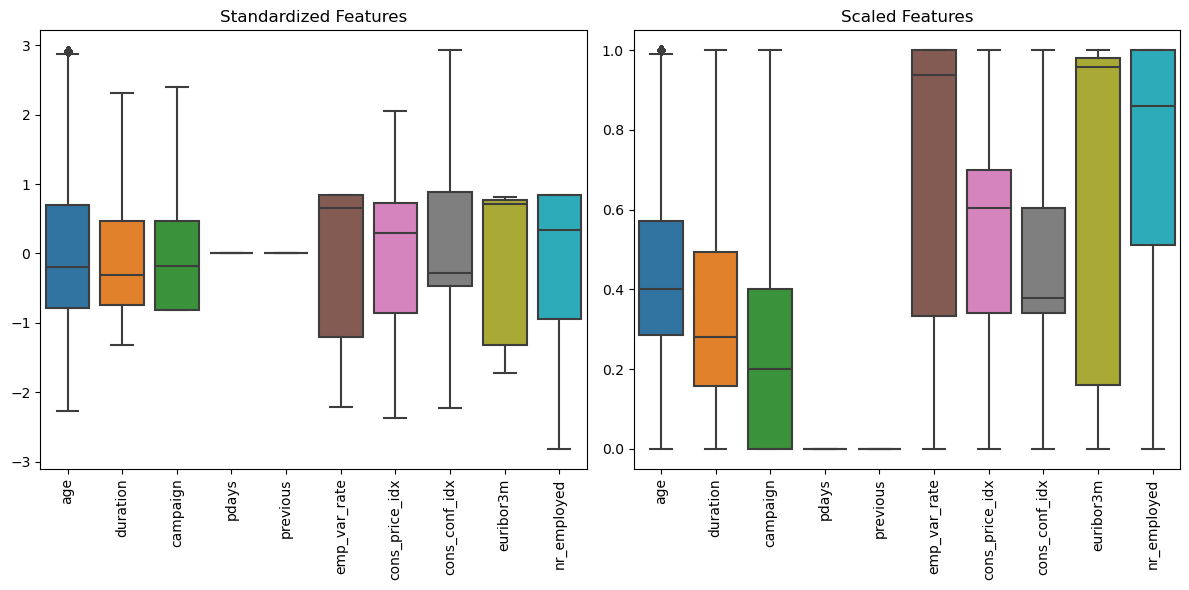

In [96]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=data_standardized[num_features])
plt.title('Standardized Features')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.boxplot(data=data_scaled[num_features])
plt.title('Scaled Features')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


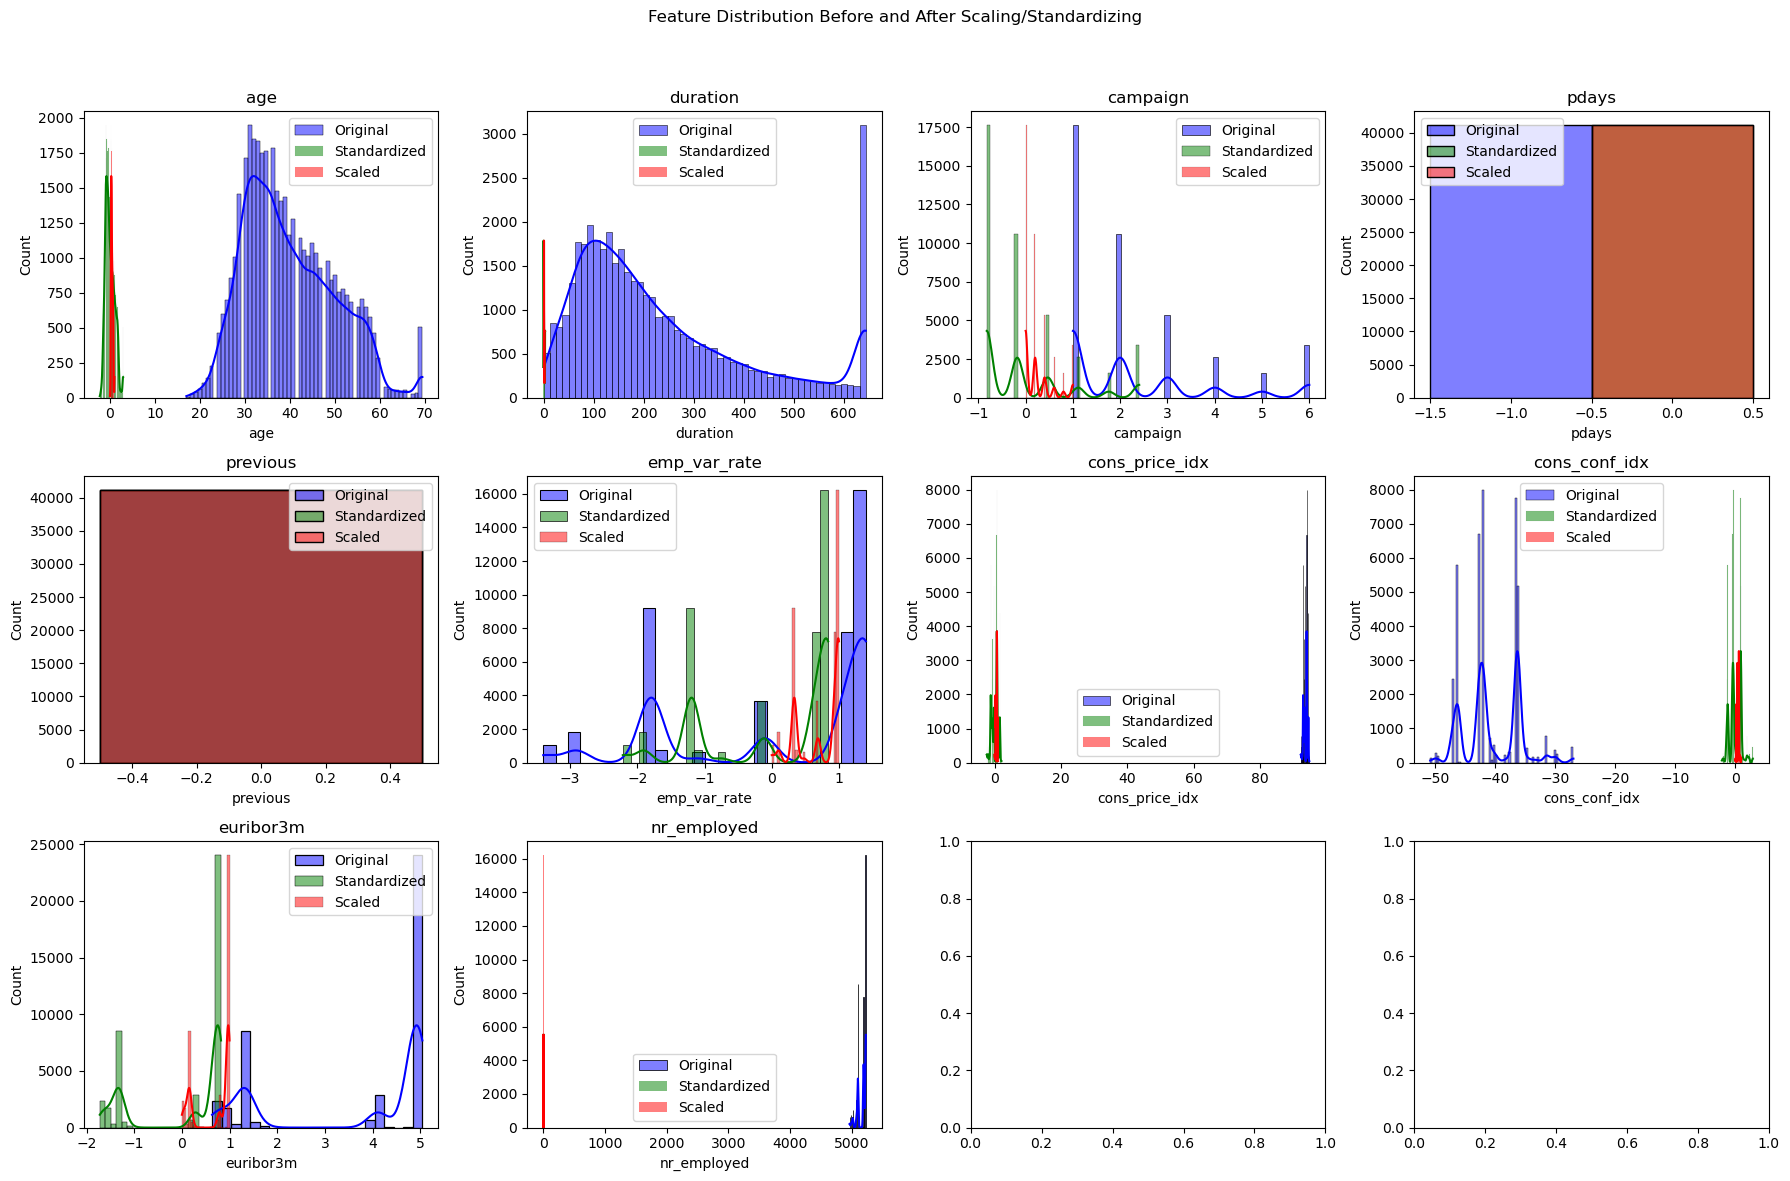

In [97]:
import warnings
warnings.filterwarnings('ignore')

# Plot histograms to show the distribution before and after transformations
fig, axes = plt.subplots(3, 4, figsize=(18, 12))
fig.suptitle('Feature Distribution Before and After Scaling/Standardizing')

for i, feature in enumerate(num_features):
    row, col = divmod(i, 4)
    sns.histplot(data[feature], ax=axes[row, col], kde=True, color='blue', label='Original')
    sns.histplot(data_standardized[feature], ax=axes[row, col], kde=True, color='green', label='Standardized')
    sns.histplot(data_scaled[feature], ax=axes[row, col], kde=True, color='red', label='Scaled')
    axes[row, col].set_title(feature)
    axes[row, col].legend()

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### If necessary, apply feature discretization, and produce a relevant graph to show the discretization

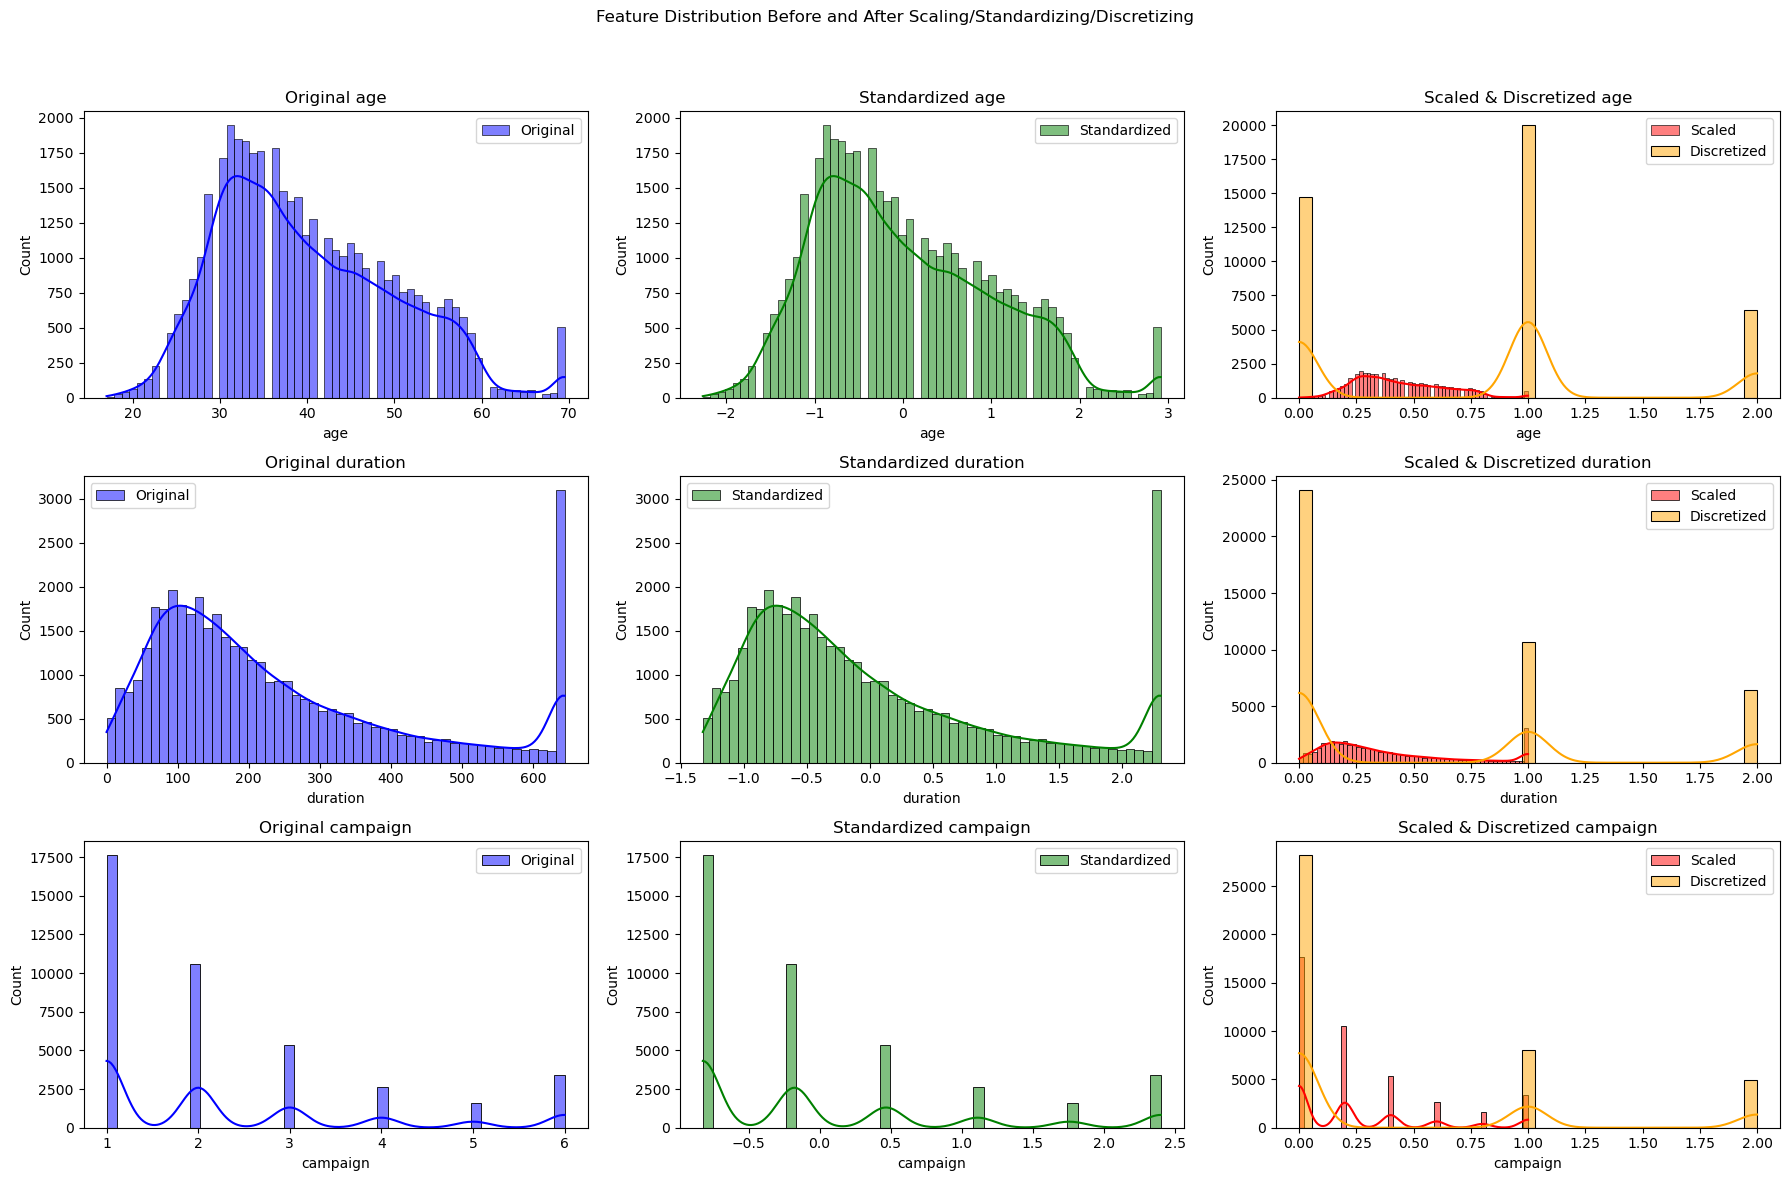

In [98]:
discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
data_discretized = data.copy()
data_discretized[['age', 'duration', 'campaign']] = discretizer.fit_transform(data[['age', 'duration', 'campaign']])

# Plot histograms to show the distribution before and after transformations
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
fig.suptitle('Feature Distribution Before and After Scaling/Standardizing/Discretizing')

for i, feature in enumerate(['age', 'duration', 'campaign']):
    row = i
    sns.histplot(data[feature], ax=axes[row, 0], kde=True, color='blue', label='Original')
    sns.histplot(data_standardized[feature], ax=axes[row, 1], kde=True, color='green', label='Standardized')
    sns.histplot(data_scaled[feature], ax=axes[row, 2], kde=True, color='red', label='Scaled')
    sns.histplot(data_discretized[feature], ax=axes[row, 2], kde=True, color='orange', label='Discretized')
    axes[row, 0].set_title(f'Original {feature}')
    axes[row, 1].set_title(f'Standardized {feature}')
    axes[row, 2].set_title(f'Scaled & Discretized {feature}')
    axes[row, 0].legend()
    axes[row, 1].legend()
    axes[row, 2].legend()

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### b. Perform Feature Engineering by executing the following task:

###  Appropriately use PCA (Principal Component Analysis) or SVD (Singular Value Decomposition) for feature reduction.

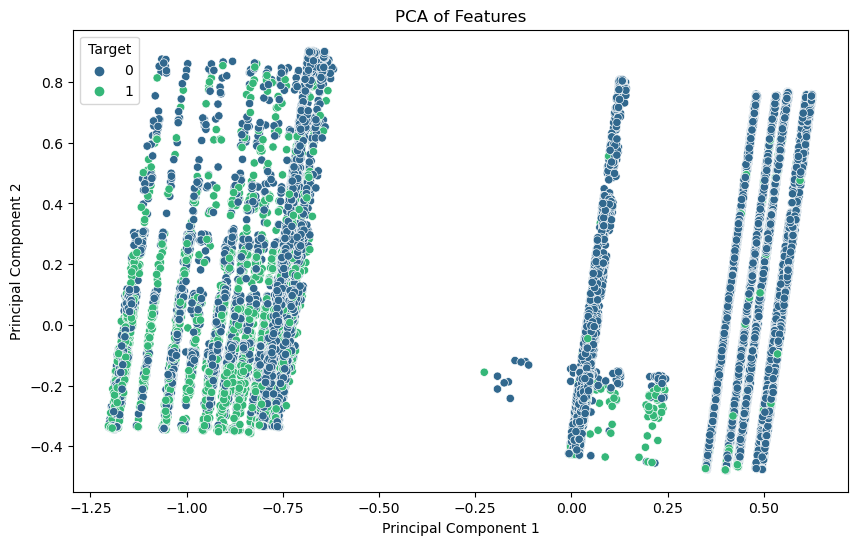

In [99]:
# Standardize the features before PCA
data_pca = data_scaled[num_features].copy()

pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_pca)

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['target'] = data['y']

# Plot the PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='target', data=pca_df, palette='viridis')
plt.title('PCA of Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Target')
plt.show()


### Identify significant and independent features using appropriate techniques.Show how you selected the features using suitable graphs.

In [102]:
column_names = data.columns

print("Column names in the dataset:")
for column in column_names:
    print(column)

Column names in the dataset:
age
job
default
housing
loan
contact
month
day_of_week
duration
campaign
pdays
previous
poutcome
emp_var_rate
cons_price_idx
cons_conf_idx
euribor3m
nr_employed
y
job_encoded
marital_married
marital_single
education_basic.6y
education_basic.9y
education_high.school
education_illiterate
education_professional.course
education_university.degree


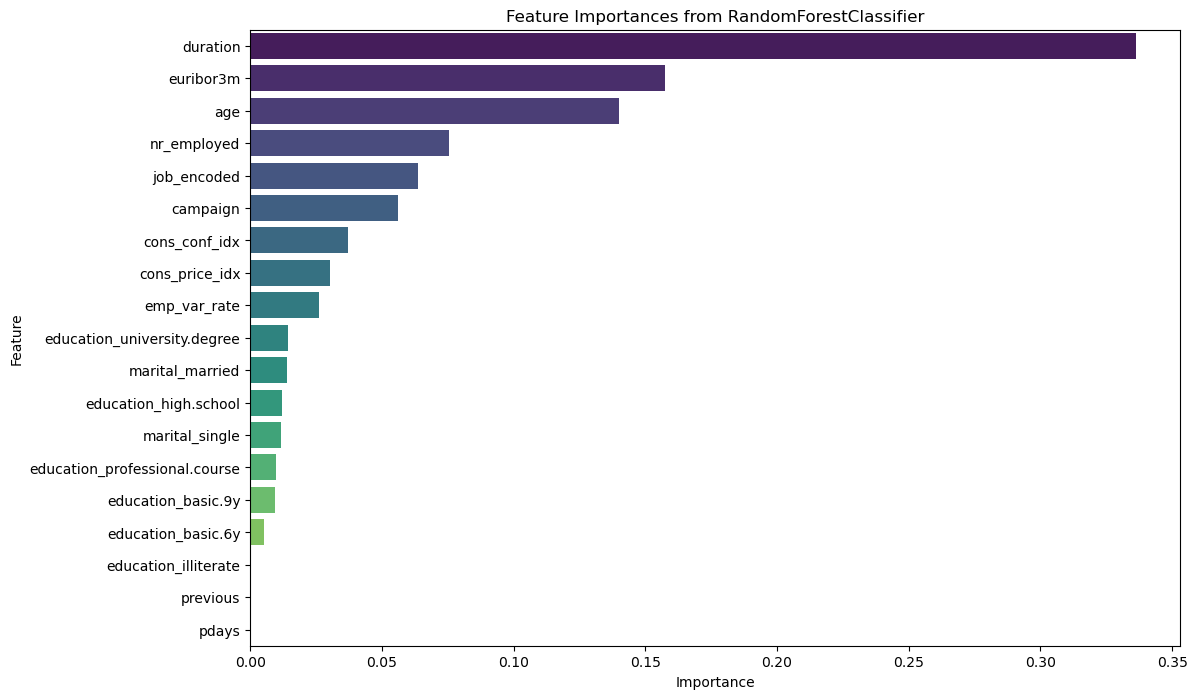

In [101]:
features = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate', 'cons_price_idx', 
                 'cons_conf_idx', 'euribor3m', 'nr_employed','job_encoded', 'marital_married', 'marital_single', 
                 'education_basic.6y', 'education_basic.9y', 'education_high.school', 'education_illiterate', 
                 'education_professional.course', 'education_university.degree']

# Prepare features and target
X = data[features]  
y = data['y']  

# Train a RandomForestClassifier to get feature importances
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X, y)

# Get feature importances
importances = clf.feature_importances_
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importances from RandomForestClassifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

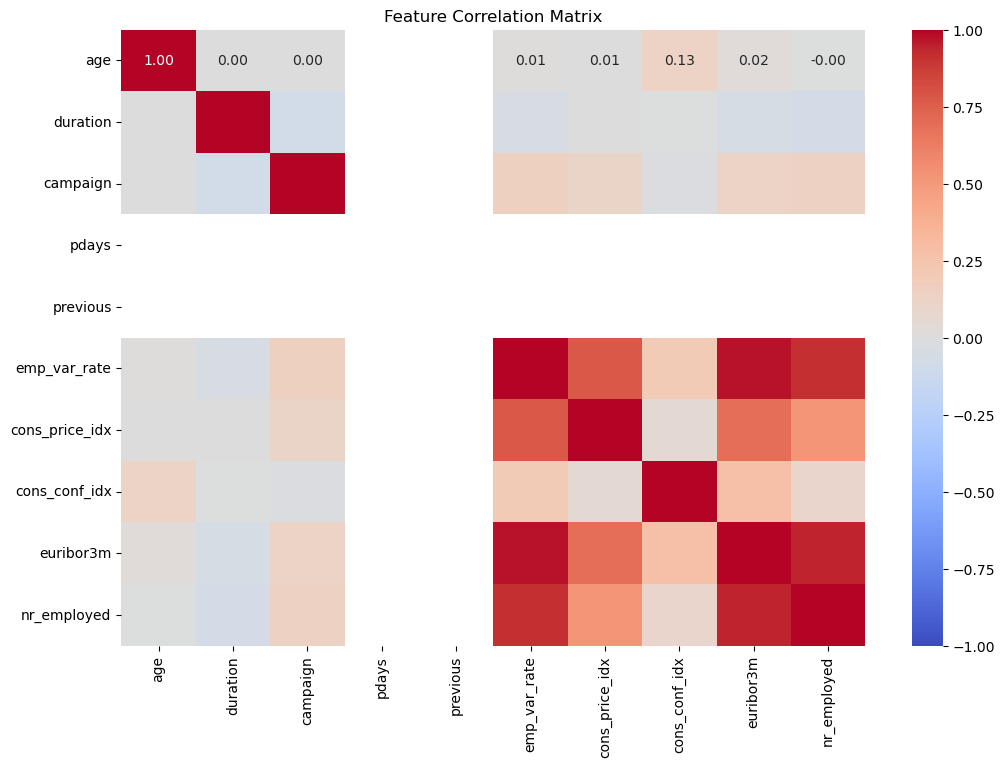

In [103]:
# Compute the correlation matrix
correlation_matrix = data[num_features].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Feature Correlation Matrix')
plt.show()


### Apply the following techniques to predict the value of Y for the test dataset (Training Dataset to Test Dataset is 0.8 to 0.2 ratio)

### Support Vector Machines (SVM), Logistic Regression (LR)

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Support Vector Machines (SVM)

In [105]:
# Initialize and train the SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm)

print("SVM Model Accuracy: ", accuracy_svm)
print("Confusion Matrix:\n", conf_matrix_svm)
print("Classification Report:\n", class_report_svm)


SVM Model Accuracy:  0.8973051711580481
Confusion Matrix:
 [[7190  105]
 [ 741  202]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.99      0.94      7295
           1       0.66      0.21      0.32       943

    accuracy                           0.90      8238
   macro avg       0.78      0.60      0.63      8238
weighted avg       0.88      0.90      0.87      8238



## Logistic Regression (LR)

In [106]:
# Initialize and train the Logistic Regression model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluate the Logistic Regression model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
class_report_lr = classification_report(y_test, y_pred_lr)

print("Logistic Regression Model Accuracy: ", accuracy_lr)
print("Confusion Matrix:\n", conf_matrix_lr)
print("Classification Report:\n", class_report_lr)


Logistic Regression Model Accuracy:  0.8985190580237922
Confusion Matrix:
 [[7090  205]
 [ 631  312]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      7295
           1       0.60      0.33      0.43       943

    accuracy                           0.90      8238
   macro avg       0.76      0.65      0.69      8238
weighted avg       0.88      0.90      0.89      8238

